In [74]:
'''
【项目03】  知乎数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格

'''

'\n【项目03】  知乎数据清洗整理和结论研究\n\n作业要求：\n1、数据清洗 - 去除空值\n要求：创建函数\n提示：fillna方法填充缺失数据，注意inplace参数\n\n2、问题1 知友全国地域分布情况，分析出TOP20\n要求：\n① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数\n② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数\n③ 通过多系列柱状图，做图表可视化\n提示：\n① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)\n② 可自行设置图表风格\n\n3、问题2 知友全国地域分布情况，分析出TOP20\n要求：\n① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数\n② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化\n③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）\n提示：\n① 可自行设置图表风格\n\n'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from matplotlib.font_manager import _rebuild
# _rebuild()
# # 防止中文乱码问题
# matplotlib不会每次启动时都重新扫描所有的字体文件并创建字体索引列表，
# # 因此在复制完字体文件之后，需要运行下面的语句以重新创建字体索引列表
# from matplotlib.font_manager import _rebuild
# _rebuild()
# #防止中文乱码问题
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False


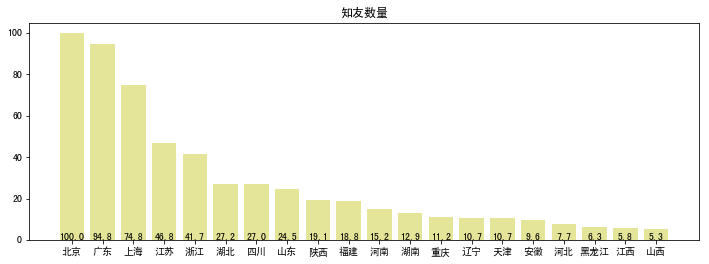

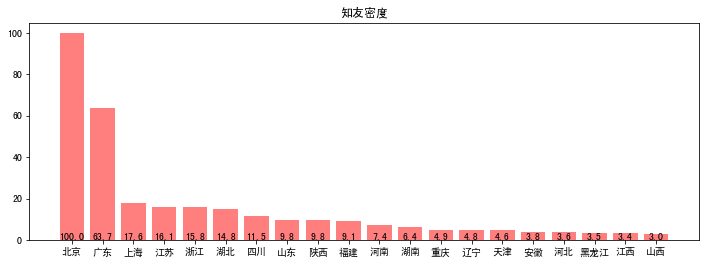

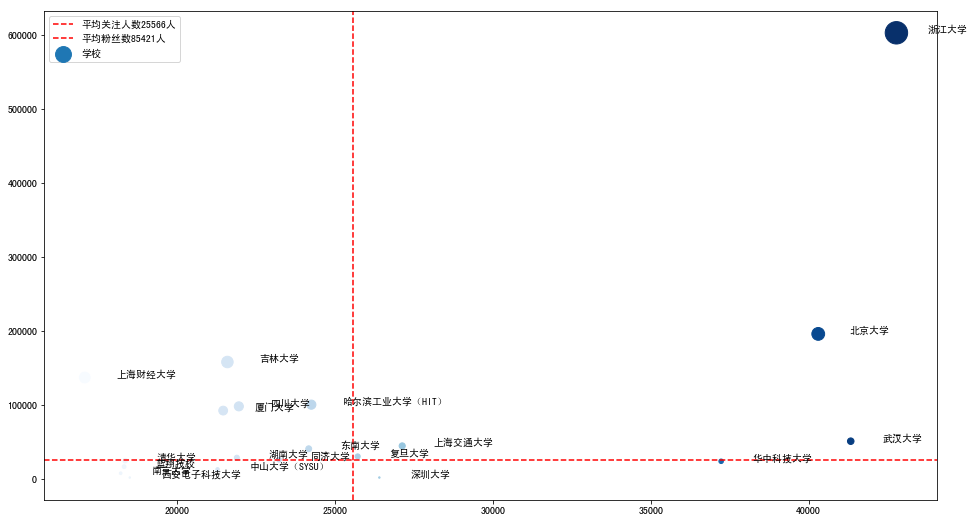

In [72]:


def DataCleanse(data):
    data_cols = data.columns
    for i in data_cols:
        if data[i].dtype == 'object':
            data[i].fillna('缺失数据', inplace = True)
        else:
            data[i].fillna(0, inplace = True)
    return(data)

zhihu_data= pd.read_csv('知乎数据_201701.csv',engine='python',encoding='utf8')
people_data=pd.read_csv('六普常住人口数.csv',engine='python',encoding='utf8')
zhihu_Cleaned = DataCleanse(zhihu_data)


zhihu_city = zhihu_Cleaned.groupby('居住地').count()
people_data['city'] = people_data['地区'].str[:-1]

hub_data = pd.merge(zhihu_city,people_data,left_index=True,right_on= 'city')[['_id','city','常住人口']]
hub_data['知友密度'] = hub_data['_id']/ hub_data['常住人口']



# 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
def Standard_Diff(X,*cols):
    cal_names=[]
    for i in cols:
        cal_name = i+ '_norl'
        X[cal_name] = (X[i]-X[i].min())/(X[i].max()-X[i].min())*100
        cal_names.append(cal_name)
    return(X,cal_names)

data_r = Standard_Diff(hub_data,'_id','知友密度')[0]
data_rcalname = Standard_Diff(hub_data,'_id','知友密度')[1]
data_id_top20 = data_r.sort_values(data_rcalname[0],ascending=False)[['city',data_rcalname[0]]][:20]
data_density_top20 = data_r.sort_values(data_rcalname[1],ascending=False)[['city',data_rcalname[1]]][:20]

fig_num = plt.figure(num = 1,figsize=(12,4))
y1 = data_id_top20[data_rcalname[0]]
plt.bar(range(20),
        y1,
        tick_label = data_id_top20['city'],
        facecolor='y',
        alpha = 0.4
       )
plt.title('知友数量')
for i,j in zip(range(20),y1):
    plt.text(i,0,'%.1f' %j,fontsize= 10,horizontalalignment="center")
fig_density = plt.figure(num = 2,figsize=(12,4))
y2 = data_density_top20[data_rcalname[1]]
plt.bar(range(20),
        y2,
        tick_label = data_id_top20['city'],
        facecolor='r',
        alpha = 0.5
       )
for i,j in zip(range(20),y2):
    plt.text(i,0,'%.1f' %j,fontsize= 10,horizontalalignment="center")
plt.title('知友密度')


school_data = zhihu_Cleaned.groupby('教育经历').sum()[['关注','关注者']].drop(['缺失数据','大学','本科','大学本科'])
school_data_top20 = school_data.sort_values('关注',ascending=False)[:20]


x = school_data_top20['关注']
y = school_data_top20['关注者']
follow = x.mean()
fans = y.mean()
plt.figure(figsize = (16,9))
plt.scatter(x,y,marker='.',s=y/300,cmap = 'Blues',c =x,label = '学校')
plt.axvline(follow,label = '平均关注人数%i人' % follow,color='red',linestyle = '--')
plt.axhline(follow,label = '平均粉丝数%i人' % fans,color='red',linestyle = '--')
plt.legend(loc = 'upper left')

for i,j,n in zip(x,y,school_data_top20.index):
    plt.text(i+1000,j,n)
# from matplotlib.font_manager import _rebuild
# _rebuild()
# # 防止中文乱码问题
# matplotlib不会每次启动时都重新扫描所有的字体文件并创建字体索引列表，
# # 因此在复制完字体文件之后，需要运行下面的语句以重新创建字体索引列表
# from matplotlib.font_manager import _rebuild
# _rebuild()
# #防止中文乱码问题
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False

